## Train a model with bike rental data using XGBoost algorithm
### Training log1p(count) dataset
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost==0.90

     |████████████████████████████████| 142.8 MB 33 kB/s s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [2]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [7]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [8]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [9]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [10]:
regressor

XGBRegressor(max_depth=5, n_estimators=150)

In [11]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[18:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:242.025	validation_1-rmse:240.479
[1]	validation_0-rmse:222.814	validation_1-rmse:221.173
[2]	validation_0-rmse:205.575	validation_1-rmse:204.063
[3]	validation_0-rmse:190.467	validation_1-rmse:188.931
[4]	validation_0-rmse:177.236	validation_1-rmse:175.83
[5]	validation_0-rmse:165.797	validation_1-rmse:164.383
[6]	validation_0-rmse:155.566	validation_1-rmse:154.231
[7]	validation_0-rmse:146.624	validation_1-rmse:145.386
[8]	validation_0-rmse:138.655	validation_1-rmse:137.59
[9]	validation_0-rmse:131.49	validation_1-rmse:130.621
[10]	validation_0-rmse:125.398	validation_1-rmse:124.688
[11]	validation_0-rmse:118.57	validation_1-rmse:118.203
[12]	validation_0-rmse:112.712	validation_1-rmse:112.613
[13]	validation_0-rmse:105.46	validation_1-rmse:105.865
[14]	validation_0-rmse:101.209	validation_1-rmse:101.796
[15]	validation_0-rmse:97.0593	va

XGBRegressor(max_depth=5, n_estimators=150)

In [12]:
df_train['count'].describe()

count    7620.000000
mean      191.659318
std       181.693885
min         1.000000
25%        41.000000
50%       144.000000
75%       284.000000
max       977.000000
Name: count, dtype: float64

In [13]:
eval_result = regressor.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

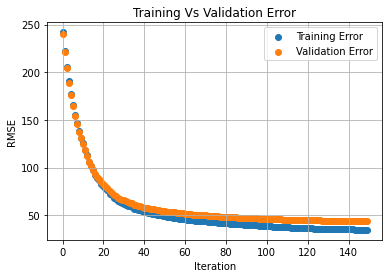

In [15]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

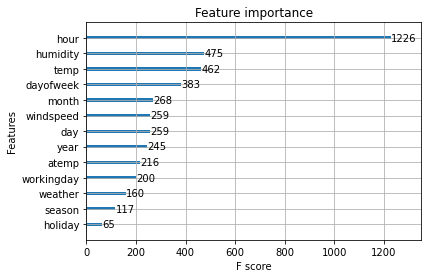

In [16]:
xgb.plot_importance(regressor)
plt.show()

In [17]:
# Updated - Changed to validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [18]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [19]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [20]:
result = regressor.predict(X_test)

In [21]:
result[:5]

array([448.20044  , 384.77954  ,  -3.0475748,  25.569548 ,  85.49567  ],
      dtype=float32)

In [22]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [23]:
df['count_predicted'] = result

In [24]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,448.200439
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,384.779541
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,-3.047575
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,25.569548
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,85.495667


In [25]:
# Negative Values are predicted
df['count_predicted'].describe()

count    3266.000000
mean      190.530060
std       170.386520
min       -81.801498
25%        41.860569
50%       153.973351
75%       287.010712
max       870.350220
Name: count_predicted, dtype: float64

In [26]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,-3.047575
35,3,2,0,1,1,19.68,23.485,63,15.0013,2011,4,19,1,3,-0.686532
100,1,1,0,1,1,6.56,6.060,31,32.9975,2011,3,3,3,4,-11.336152
133,20,1,0,0,3,6.56,9.090,93,7.0015,2011,1,8,5,9,-5.350302
158,45,1,0,0,2,12.30,13.635,100,19.9995,2011,3,5,5,8,-8.830898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,3,1,0,1,1,4.92,6.060,50,15.0013,2011,1,10,0,2,-7.941698
3071,6,1,0,0,1,3.28,4.545,53,12.9980,2011,1,9,6,7,-58.085678
3093,4,1,0,1,1,5.74,6.820,46,12.9980,2012,2,13,0,2,-5.543156
3118,2,1,0,1,2,10.66,13.635,93,7.0015,2011,2,8,1,2,-1.763405


In [27]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [28]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [29]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [30]:
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/base.py:1160: RuntimeWarning: overflow encountered in expm1
  new_values = map_f(values, mapper)


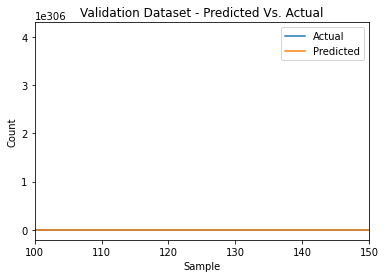

In [31]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

ValueError: supplied range of [-inf, inf] is not finite

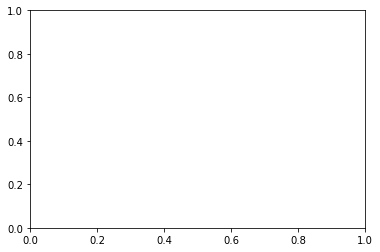

In [32]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [ ]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

In [35]:
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df['count'],
                                                    df['count_predicted'])**.5))

RMSE: 43.43


In [36]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [37]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.29


In [38]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [39]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [40]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [41]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [42]:
result = regressor.predict(X_test)

In [43]:
result[:5]

array([2.3321223 , 1.9005593 , 1.6316103 , 1.0376964 , 0.95743227],
      dtype=float32)

In [44]:
np.expm1(result)

array([  9.299778,   5.689635,   4.1121  , ..., 133.68597 ,  92.35798 ,
        52.00194 ], dtype=float32)

In [45]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [46]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,9.299778
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,5.689635
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,4.112100
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1.822707
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.604999


In [47]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [48]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [49]:
# RMSLE (Kaggle) Score
# Test 1: 0.62
# Test 2(log of count): 0.40